# 03 Initializer
## 맨 땅에 이니셜라이저 코드

In [1]:
import tensorflow as tf
tf.reset_default_graph()

#아래 중 한가지 골라서 시작하면 되는데, 그에 따라 밑에 코드들의 결과값도 다르게 나올 것.
#특정 constant로 시작. 0이나 1을 집어넣어도 되지만, 밑의 코드들을 이용해도 된다!
init_w = tf.keras.initializers.constant(7.0) #tensor에서는 안 잡힙니다.
#1로 시작
#init_w = tf.keras.initializers.ones
#0으로 시작
#init_w = tf.keras.initializers.zeros
#identity matrix로 시작. identity는 조금 복잡하게 만든다!
#init_w = tf.keras.initializers.identity


w = tf.get_variable('w', (3, 5), dtype=tf.float32, initializer=init_w) #(3, 5)는 shape

init = tf.global_variables_initializer() #session 밖에서 정의. 이 initializer와 밑의 sess.run이 필요.
    
with tf.Session() as sess:
    sess.run(init) #이게 없어도 에러 뜸
    w_run = sess.run(w)
print(w_run)
print(w)

[[7. 7. 7. 7. 7.]
 [7. 7. 7. 7. 7.]
 [7. 7. 7. 7. 7.]]
<tf.Variable 'w:0' shape=(3, 5) dtype=float32_ref>


In [2]:
g = tf.get_default_graph()
ops = g.get_operations()
for op in ops :
    print(op.name)

w/Initializer/Const
w
w/Assign
w/read
init


In [4]:
for op in ops :
    for tensor in op.outputs :
        print(tensor)

Tensor("w/Initializer/Const:0", shape=(3, 5), dtype=float32)
Tensor("w:0", shape=(3, 5), dtype=float32_ref)
Tensor("w/Assign:0", shape=(3, 5), dtype=float32_ref)
Tensor("w/read:0", shape=(3, 5), dtype=float32)


## initializer code

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
<tf.Variable 'w:0' shape=(100, 100) dtype=float32_ref>
<class 'numpy.ndarray'>
(100, 100)
float32


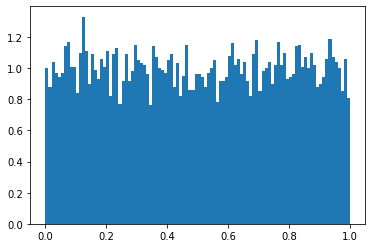

0.49901778 0.2900362


In [11]:
%matplotlib inline 
#python에서는 빼줘야 함. jupyther에 특화된 것. object print 방지.

import tensorflow as tf; tf.reset_default_graph()
import matplotlib.pyplot as plt
import numpy as np #reshape을 위해 필요

#Random Normal. default는 mean=0, std=0.05. seed 고정하면 같은 변수들로 돌리게 됨.
#init_w = tf.keras.initializers.RandomNormal(mean=0, stddev=1, seed=3) 
#Truncated Normal. 분포를 자름(truncation).
#init_w = tf.keras.initializers.TruncatedNormal() # mean=0, (before_truncation_)std=0.05
#Random Uniform
init_w = tf.keras.initializers.RandomUniform(minval=0., maxval=1.) # minval=-0.05, maxval=0.05
w = tf.get_variable('w', (100,100), tf.float32, init_w)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(w) #w자체가 tensor라서 tensor가 print 
    w_run = sess.run(w)
    print(type(w_run)) #(100, 100)이니까 너무 커서 일단 type이나 shape 등만 print
    print(w_run.shape) 
    print(w_run.dtype)
    
plt.hist(w_run.reshape((-1,)), bins=100, density=True)
plt.show()
print(w_run.reshape((-1,)).mean(), w_run.reshape((-1,)).std())

In [9]:
for op in ops :
    for tensor in op.outputs :
        print(tensor)

Tensor("w/Initializer/Const:0", shape=(3, 5), dtype=float32)
Tensor("w:0", shape=(3, 5), dtype=float32_ref)
Tensor("w/Assign:0", shape=(3, 5), dtype=float32_ref)
Tensor("w/read:0", shape=(3, 5), dtype=float32)


In [18]:
%matplotlib inline
import tensorflow as tf; tf.reset_default_graph()
import numpy as np
import matplotlib.pyplot as plt

#Orthogonal. 따로 Seed 설정하지 않으면 숫자는 계속 바뀜
init_w = tf.keras.initializers.Orthogonal()
w = tf.get_variable('w', (3,5), dtype=tf.float32, initializer=init_w)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    w_run = sess.run(w)
    
print(w_run)
print(w_run.shape)

[[ 0.11261761 -0.9678645  -0.19303802  0.11179052  0.02818963]
 [ 0.09340817  0.07823173 -0.04827875  0.25851047  0.9570769 ]
 [ 0.7423079   0.17836964 -0.16660954  0.57180834 -0.24987954]]
(3, 5)


In [19]:
for i in range(3):
    for j in range(3):
        print(np.abs(np.sum(w_run[i]*w_run[j])))

0.99999994
9.313226e-09
1.21071935e-08
9.313226e-09
1.0
1.4901161e-08
1.21071935e-08
1.4901161e-08
1.0


In [20]:
total_sum = 0
for i in range(3):
    for j in range(3):
        total_sum += np.abs(np.sum(w_run[i]*w_run[j]))
print(total_sum)

3.000000013038516
